In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install gensim scikit-learn matplotlib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

/usr/local/lib/python3.12/dist-packages/google/cloud/aiplatform/models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
corpus=[
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic menanings",
    "NLP i used in chatbots and virtual assistants",
    "Word2vec is a powerful tool for creating word embeddings"
]

In [5]:
tokenised_corpus=[word_tokenize(sentence.lower())for sentence in corpus]
print(tokenised_corpus)

[['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'menanings'], ['nlp', 'i', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants'], ['word2vec', 'is', 'a', 'powerful', 'tool', 'for', 'creating', 'word', 'embeddings']]


In [10]:
model=Word2Vec(sentences=tokenised_corpus,vector_size=100,window=5,min_count=1,workers=4)
model.save("word2vec.model")

In [12]:

model = Word2Vec.load("word2vec.model")

In [14]:
words=list(model.wv.index_to_key)[:10]
print(words)


['embeddings', 'word', 'a', 'is', 'creating', 'for', 'tool', 'powerful', 'word2vec', 'assistants']


In [16]:
word_vectors=[model.wv[word] for word in words]
print(word_vectors)

[array([-5.3783914e-04,  2.4114049e-04,  5.1047872e-03,  9.0173688e-03,
       -9.3049658e-03, -7.1231346e-03,  6.4569083e-03,  8.9754937e-03,
       -5.0214338e-03, -3.7658475e-03,  7.3773470e-03, -1.5390586e-03,
       -4.5363205e-03,  6.5584332e-03, -4.8570889e-03, -1.8134445e-03,
        2.8732899e-03,  9.9484157e-04, -8.2795518e-03, -9.4507793e-03,
        7.3129758e-03,  5.0743474e-03,  6.7547364e-03,  7.6550903e-04,
        6.3532321e-03, -3.4006005e-03, -9.5433550e-04,  5.7744109e-03,
       -7.5168740e-03, -3.9392458e-03, -7.5149718e-03, -9.2744175e-04,
        9.5366491e-03, -7.3188017e-03, -2.3340140e-03, -1.9308280e-03,
        8.0829635e-03, -5.9368564e-03,  3.5769561e-05, -4.7485856e-03,
       -9.5983753e-03,  5.0031086e-03, -8.7637762e-03, -4.3929708e-03,
       -3.5897130e-05, -2.9384712e-04, -7.6631051e-03,  9.6113179e-03,
        4.9801888e-03,  9.2272609e-03, -8.1550283e-03,  4.4915406e-03,
       -4.1394485e-03,  8.3299726e-04,  8.4980745e-03, -4.4582738e-03,
     

In [17]:
from sklearn.decomposition import PCA


In [19]:
pca=PCA(n_components=2)
pca_result=pca.fit_transform(word_vectors)


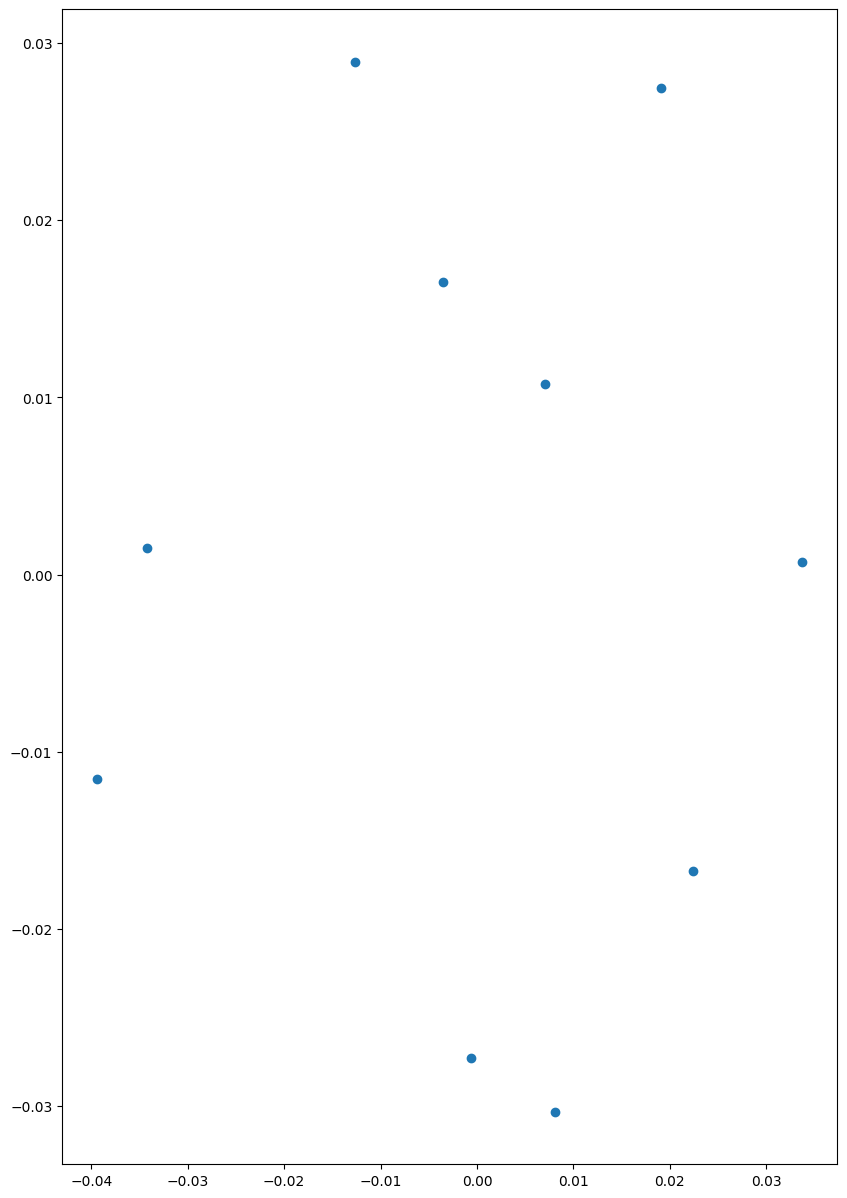

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
plt.scatter(pca_result[:,0],pca_result[:,1])

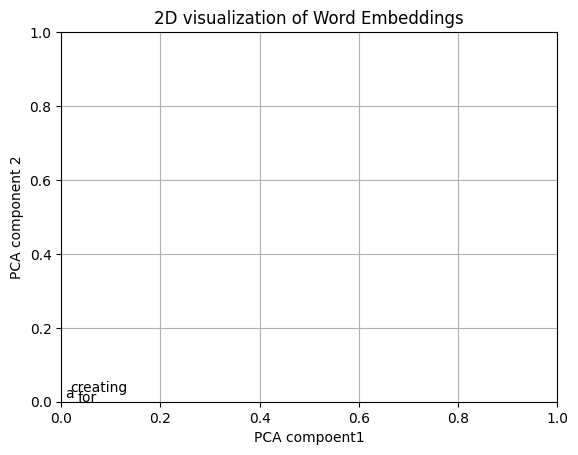

In [23]:
for i,word in enumerate(words):
    plt.annotate(word,xy=(pca_result[i,0],pca_result[i,1]))
plt.title("2D visualization of Word Embeddings")
plt.xlabel("PCA compoent1")
plt.ylabel("PCA component 2")
plt.grid(True)
plt.show()